## Data620 - FINAL PROJECT 

**Group Memebers : Vijaya Cherukuri, Abdellah Ait Elmouden, Priya Shaji, Habib Khan**

### Introduction

Social  networks  are  the  main  resources  to  gather information   about   people’s   opinion   and   sentiments   towards different  topics  as  they  spend  hours  daily  on social  media and share   their   opinion. In   this   project   we   show   the application of sentimental analysis and how to connect to Twitter and  run  sentiment analysis  queries, based on News Topics during COVID-19.

### Motivation

Six months since the first COVID-19 case in the United States, and 113+ days into the earliest Lockdown Order of New York City, now the city reopen the time some other states see coronavirus cases rise. how have people been feeling through this special time? Do we know how others are responding to the pandemic? The Corona Virus endangers our physical health indeed, but alongside, social distancing also poses a threat to our emotional stability. Thus, it is crucial to understand public sentiments under COVID-19. To analyze these we'll use Sentiment Analysis on tweets to aid the understanding of sentiment trends.

As of now Covid-19 is one of the top trending topics. Presently it stands in 7th position in the twitter hot topics.

![alt text](Twittertrend.png)

### Data Source

We will be using the Twitter API, as our tool to collect data for this analysis. Twitter is a gold mine of data. Unlike other social platforms, almost every user’s tweets are completely public and pullable. This is a huge plus if you’re trying to get a large amount of data to run analytics on.

![alt text](twitter.png)

### Sentiment Analysis

Note: Results will differ each time the program runs as Network and Sentiment analysis is done in a dynamic dataset.

Import required Libraries

In [27]:
#import nltk
#nltk.download('vader_lexicon')
#pip install tweepy
#pip install textblob

#from nltk.corpus import stopwords
#from nltk.stem.wordnet import WordNetLemmatizer
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
#import nltk
#nltk.download('wordnet')

import pandas as pd
import re
import textblob
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 
import nltk
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
#nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
import warnings
warnings.filterwarnings('ignore')

Connect to Twitter using 'consumer key', 'consumer secret', 'access token', 'access token secret'

In [28]:
consumer_key='lub2vXiqJXY5JVYTtxaQWvshE'
consumer_secret='o4tRCRf1YWo1WdrQzx1xNhuSvOIshguPZNx86U9UVCaNzsLPEF'
access_token='165276006-rCCM1Nt4txkpxMa01RJLUuq7WrF9sREqxHFApiUm'
access_token_secret='lf2SmfrfrIBd2aiYmq24oPfXVlZSLBamJDEMjM5eHtvkE'

Set API path

In [29]:
auth =  tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)
public_tweets = api.search('Covid_19')

Search for tweets related to Covid 

In [30]:

search_term = "#Covid -filter:retweets"

tweets = tweepy.Cursor(api.search,
                   q=search_term,
                   lang="en",
                   since='2020-03-25').items(1000)

Convert twitter data into a dataframe

In [31]:

json_data = [r._json for r in tweets]
df = pd.io.json.json_normalize(json_data)


Analyze the dataset

In [32]:
df.head()

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.id,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates
0,Sun Jul 19 15:53:27 +0000 2020,1284879030676787201,1284879030676787201,THIS IS WHY the rush to open schools and the e...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sun Jul 19 15:53:27 +0000 2020,1284879030525874177,1284879030525874177,#Restaurants in these #COVID times should do #...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sun Jul 19 15:52:58 +0000 2020,1284878908442185730,1284878908442185730,Radiate #Covid ? https://t.co/FkjrIHLhwS,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 19 15:52:56 +0000 2020,1284878899545911297,1284878899545911297,Excuse me!!\n#listen #Covid_19 #covid #school ...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Sun Jul 19 15:52:52 +0000 2020,1284878882827653120,1284878882827653120,No matter which side of the aisle ur on this @...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In order to do Sentiment anaysis on the dataframe, we will keep only one column "texts" an drop other columns not required for sentiment analysis

Create a new column 'Tweets' 

In [33]:

df['Tweets'] = df['text']

Create a new dataframe object "df_SentimentAnalysis" to preserve the original dataset "df" 

In [34]:

df_SentimentAnalysis = df

df_SentimentAnalysis.head() ## added new column "Tweets"

,created_at,id,id_str,text,truncated,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,...,quoted_status.place.url,quoted_status.place.place_type,quoted_status.place.name,quoted_status.place.full_name,quoted_status.place.country_code,quoted_status.place.country,quoted_status.place.contained_within,quoted_status.place.bounding_box.type,quoted_status.place.bounding_box.coordinates,Tweets
0,Sun Jul 19 15:53:27 +0000 2020,1284879030676787201,1284879030676787201,THIS IS WHY the rush to open schools and the e...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,THIS IS WHY the rush to open schools and the e...
1,Sun Jul 19 15:53:27 +0000 2020,1284879030525874177,1284879030525874177,#Restaurants in these #COVID times should do #...,True,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#Restaurants in these #COVID times should do #...
2,Sun Jul 19 15:52:58 +0000 2020,1284878908442185730,1284878908442185730,Radiate #Covid ? https://t.co/FkjrIHLhwS,False,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Radiate #Covid ? https://t.co/FkjrIHLhwS
3,Sun Jul 19 15:52:56 +0000 2020,1284878899545911297,1284878899545911297,Excuse me!!\n#listen #Covid_19 #covid #school ...,False,"<a href=""http://twitter.com/download/android"" ...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Excuse me!!\n#listen #Covid_19 #covid #school ...
4,Sun Jul 19 15:52:52 +0000 2020,1284878882827653120,1284878882827653120,No matter which side of the aisle ur on this @...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,None,NaN,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No matter which side of the aisle ur on this @...


Drop all other columns except "Tweets" for sentiment analysis

In [35]:
drop_list = ["Tweets"]
df_SentimentAnalysis = df_SentimentAnalysis.drop(df_SentimentAnalysis.columns.difference(drop_list), axis=1)

Analyze the dataset

In [36]:
df_SentimentAnalysis.head()

,Tweets
0,THIS IS WHY the rush to open schools and the e...
1,#Restaurants in these #COVID times should do #...
2,Radiate #Covid ? https://t.co/FkjrIHLhwS
3,Excuse me!!\n#listen #Covid_19 #covid #school ...
4,No matter which side of the aisle ur on this @...


### Data Preprocessing

Create a function to clean the tweets

In [37]:


def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df_SentimentAnalysis['Tweets'] = df_SentimentAnalysis['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df_SentimentAnalysis

,Tweets
0,THIS IS WHY the rush to open schools and the e...
1,Restaurants in these COVID times should do ref...
2,Radiate Covid ?
3,Excuse me!!\nlisten Covid_19 covid school blac...
4,No matter which side of the aisle ur on this ...
...,...
995,India's economic policies driven for last 6 yr...
996,"21 I can’t even Facebook anymore, I drop in t..."
997,60 I think you mean 4% as oppose to .04% (I’...
998,SC: dismissed a plea lodged by the Supreme Cou...


### Data Exploration

Now lets explore our data based on subjectivity and polarity

#### "Subjectivity" (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) 

#### "Polarity" (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score).


Create a function to get the subjectivity and polarity abd further create two new columns to analysze our dataframe

In [38]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df_SentimentAnalysis['Subjectivity'] = df_SentimentAnalysis['Tweets'].apply(getSubjectivity)
df_SentimentAnalysis['Polarity'] = df_SentimentAnalysis['Tweets'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df_SentimentAnalysis

,Tweets,Subjectivity,Polarity
0,THIS IS WHY the rush to open schools and the e...,0.500000,0.000000
1,Restaurants in these COVID times should do ref...,0.100000,0.000000
2,Radiate Covid ?,0.000000,0.000000
3,Excuse me!!\nlisten Covid_19 covid school blac...,0.525000,-0.289062
4,No matter which side of the aisle ur on this ...,0.000000,0.000000
...,...,...,...
995,India's economic policies driven for last 6 yr...,0.133333,0.100000
996,"21 I can’t even Facebook anymore, I drop in t...",0.375000,-0.125000
997,60 I think you mean 4% as oppose to .04% (I’...,0.406250,-0.156250
998,SC: dismissed a plea lodged by the Supreme Cou...,0.000000,0.000000


#### Let’s see how well the sentiments are distributed. 
#### A good way to accomplish this task is by understanding the common words by plotting word clouds.

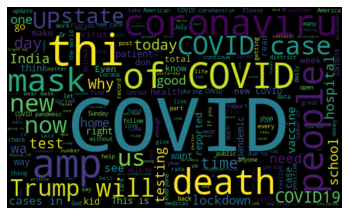

In [39]:
# word cloud visualization
allWords = ' '.join([twts for twts in df_SentimentAnalysis['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### "Covid" and "Mask" are the most used words related to covid tweets.This result will vary each time we run the code

In [40]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
    
df_SentimentAnalysis['Analysis'] = df_SentimentAnalysis['Polarity'].apply(getAnalysis)
# Show the dataframe
    
df_SentimentAnalysis
    
    

,Tweets,Subjectivity,Polarity,Analysis
0,THIS IS WHY the rush to open schools and the e...,0.500000,0.000000,Neutral
1,Restaurants in these COVID times should do ref...,0.100000,0.000000,Neutral
2,Radiate Covid ?,0.000000,0.000000,Neutral
3,Excuse me!!\nlisten Covid_19 covid school blac...,0.525000,-0.289062,Negative
4,No matter which side of the aisle ur on this ...,0.000000,0.000000,Neutral
...,...,...,...,...
995,India's economic policies driven for last 6 yr...,0.133333,0.100000,Positive
996,"21 I can’t even Facebook anymore, I drop in t...",0.375000,-0.125000,Negative
997,60 I think you mean 4% as oppose to .04% (I’...,0.406250,-0.156250,Negative
998,SC: dismissed a plea lodged by the Supreme Cou...,0.000000,0.000000,Neutral


Now let's analyze sentiments features of the dataframe

Display positive tweets 

In [41]:

print('Displaying positive tweets:\n')
j=1
sortedDF = df_SentimentAnalysis.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1
    if(j==5):
        break

Displaying positive tweets:

1) Satisfied customer! ★★★★★ "Exactly as described and pictured. Shipped quickly. Already used it and it's been great!… 

2) The award for the coolest small town in America this week goes to Tenino, Washington, pop 1,800, with their own uni… 

3) Intelligent Americans already knew that numerous deaths attributed to Covid-19 were incorrect.  If a person died &amp;… 

4)  1  It works on malaria and lupus, but not so much against the Covid.

Here's… 



Display negative tweets  

In [42]:

print('Displaying negative tweets:\n')
j=1
sortedDF = df_SentimentAnalysis.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1
    if(j==5):
        break

Displaying negative tweets:

1) Excuse me!!
listen Covid_19 covid school blackpeople news wtf wth 

2)  Why don’t Democrats &amp; Republicans come together &amp; agree on postponing all elections for 1 year due to… 

3) I spent the year looking forward to returning to Broadkill Beach, DE with my oldest friends to eat leftover meatbal… 

4) _Kumar   ExamsInCovidASuicide
If policemen of our society is not safe from… 



### Plot the polarity and subjectivity as a scatter plot. 

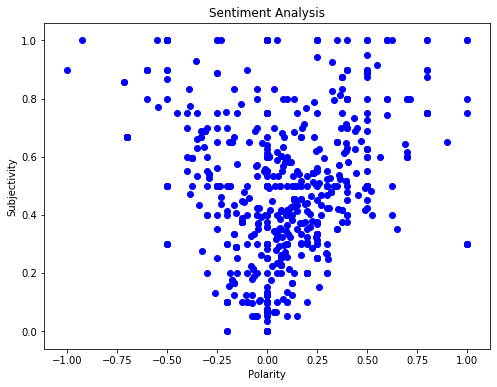

In [43]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df_SentimentAnalysis.shape[0]):
  plt.scatter(df_SentimentAnalysis["Polarity"][i], df_SentimentAnalysis["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

It looks like the majority of the tweets are positive, as many of the points are on the right side of the polarity at value 0.00.

### Sentiment Scores

Display the percentage of positive tweets

In [44]:

ptweets = df_SentimentAnalysis[df_SentimentAnalysis.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

38.1

Display the percentage of negative tweets

In [45]:

ntweets = df_SentimentAnalysis[df_SentimentAnalysis.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

20.1

Plotting and visualizing the counts of 

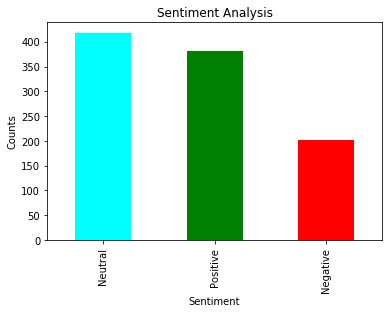

In [46]:

plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df_SentimentAnalysis['Analysis'].value_counts().plot(kind = 'bar' , color=['cyan', 'green', 'red'])
plt.show()

As we analyze from the above bar graph, Neutral tweets and positive tweets are more compared to negative tweets.